In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn

%matplotlib inline

In [14]:
import seaborn as sns

In [5]:
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) 
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]


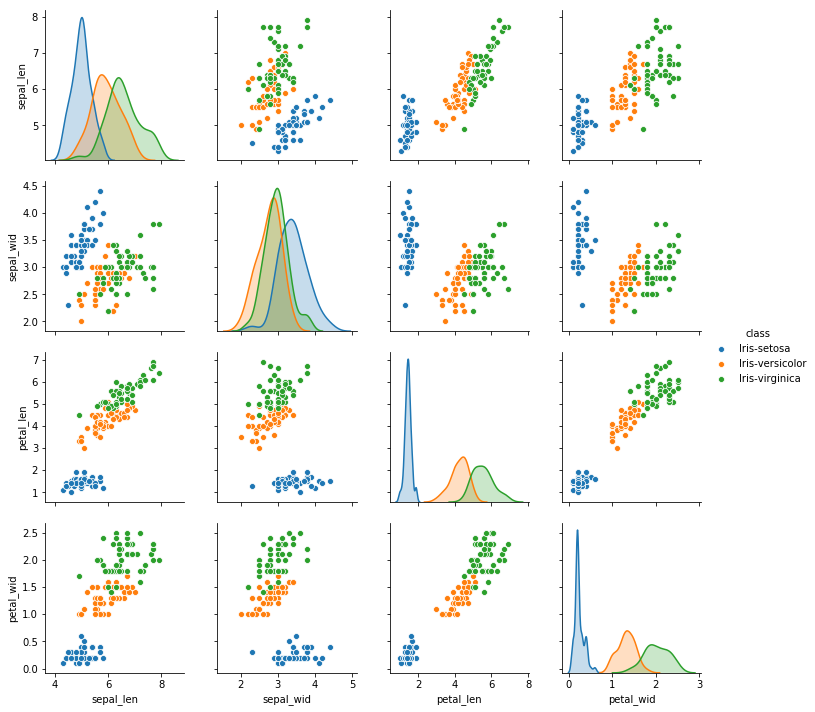

In [16]:
sns.pairplot(df,hue = 'class')

## PCA Starts

### Step 1: Feature Scaling using preprocessing->StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### Step 2: Eigen Decomposition


In [20]:
mean_vec = np.mean(X_std,axis=0)

In [24]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [25]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### Sort the Eigen values for obtaining principal component?

In [26]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [27]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [28]:
eig_vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [29]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [30]:
eig_pairs

[(2.9303537755893165,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173417,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.1483422264816399,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559571,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

### Explained Variance

In [31]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


In [41]:
x_axis = np.arange(4)
x_axis

array([0, 1, 2, 3])

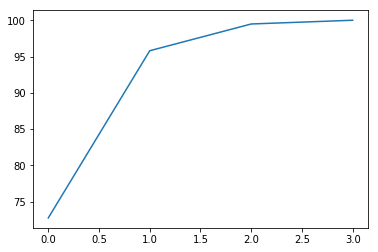

In [45]:
sns.lineplot(x = x_axis, y = cum_var_exp)


### hstack() used to stack a row columnwise, here it is used to obtain projection matrix

In [37]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))

### Projection to new feature space

In [38]:
Y = X_std.dot(matrix_w)